# <html>
   
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: auto; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=100px width=auto style="padding:10px; vertical-align: center;">
 
</div>
   
<div   style:"text-align: center; background-image: linear-gradient(to left, rgb(255, 255, 255), rgb( 219, 204, 245  ));width: 400px; height: 30px; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Course: AI </h1>

</div>
    <div   style:"border: 3px solid green;text-align: center; ">
<h1 style="font-family: Georgia; color: black; text-align: center; ">Project5</h1>

</div>

   <div>    
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Yasaman AmouJafary</h1>
<h1 style="font-family: Georgia; color: black; text-align: center; font-size:15px;">Sid:810102480</h1>

</div>
   

</html>

## Loading DataFrame:

In [1]:
import pandas as pd

file_path = 'musicLyrics.csv'

music_df = pd.read_csv(file_path)

music_df.head()

,Lyric
0,Cryptic psalms Amidst the howling winds A scor...
1,Im sleeping tonight with all the wolves Were d...
2,Wings of the darkest descent Fall from the rea...
3,[Verse 1] Norrid Radd was my real name Had a j...
4,Deep in the dungeons of doom and despair Sneak...


## Preprocessing:

In [2]:
!pip install sentence-transformers


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string
import re
import nltk

In [4]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data

True

In [5]:
def preprocessing(text, method = 'lemmatize'):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text) 
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    if method == 'stem':
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    elif method == 'lemmatize':
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

In [6]:
music_df['processed'] = music_df['Lyric'].apply(preprocessing, method='lemmatize')

music_df.head()

,Lyric,processed
0,Cryptic psalms Amidst the howling winds A scor...,cryptic psalm amidst howling wind scorching so...
1,Im sleeping tonight with all the wolves Were d...,im sleeping tonight wolf dreaming life thats b...
2,Wings of the darkest descent Fall from the rea...,wing darkest descent fall realm dark blackest ...
3,[Verse 1] Norrid Radd was my real name Had a j...,verse norrid radd real job hated day day told ...
4,Deep in the dungeons of doom and despair Sneak...,deep dungeon doom despair sneak place dark eke...


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

original_texts = music_df['Lyric'].tolist()

vectorizer_raw = CountVectorizer()
X_raw = vectorizer_raw.fit_transform(original_texts)

raw_word_counts = pd.DataFrame(X_raw.toarray(), columns=vectorizer_raw.get_feature_names_out())
raw_freq = raw_word_counts.sum().sort_values(ascending=False).head(20)



In [8]:
processed_texts = music_df['processed'].tolist()

vectorizer_processed = CountVectorizer()
X_processed = vectorizer_processed.fit_transform(processed_texts)

processed_word_counts = pd.DataFrame(X_processed.toarray(), columns=vectorizer_processed.get_feature_names_out())
processed_freq = processed_word_counts.sum().sort_values(ascending=False).head(20)

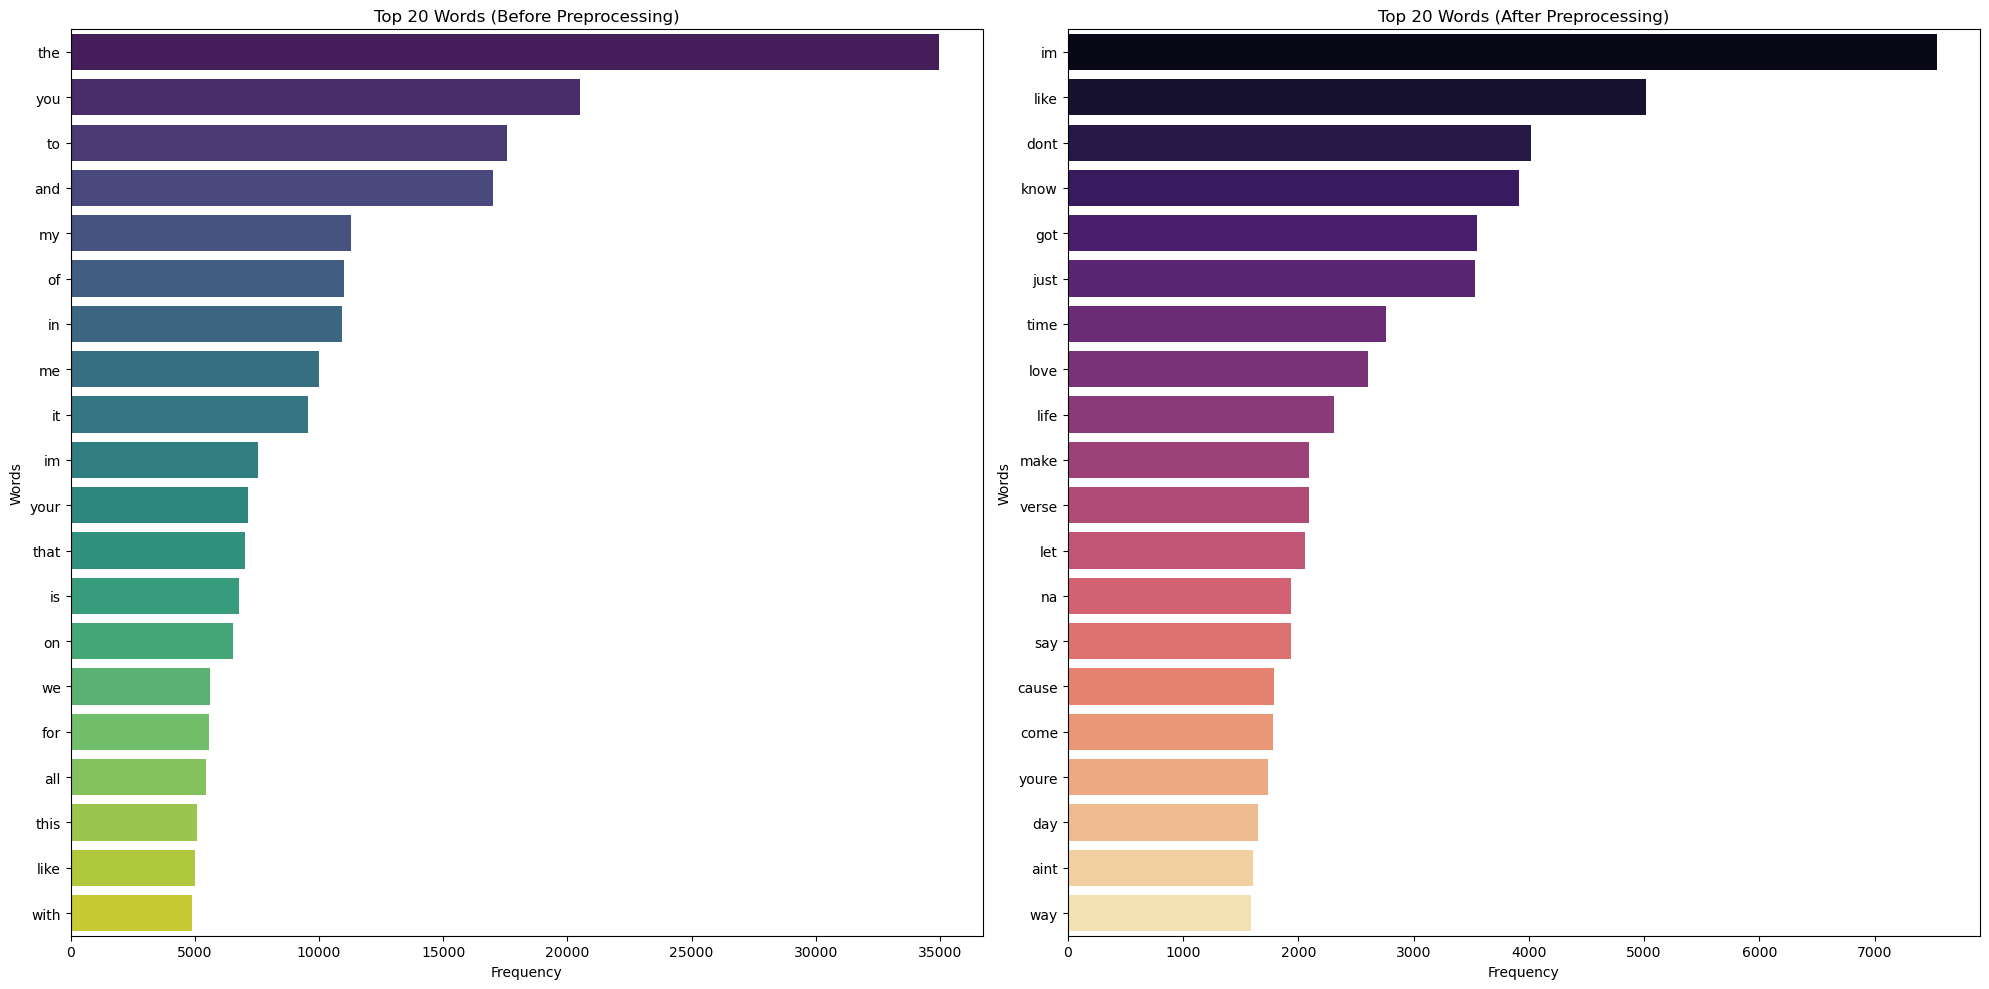

In [9]:
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(x=raw_freq.values, y=raw_freq.index, hue=raw_freq.index, palette='viridis', legend=False)
plt.title('Top 20 Words (Before Preprocessing)')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.subplot(1, 2, 2)
sns.barplot(x=processed_freq.values, y=processed_freq.index, hue=processed_freq.index, palette='magma', legend=False)
plt.title('Top 20 Words (After Preprocessing)')
plt.xlabel('Frequency')
plt.ylabel('Words')

plt.tight_layout()
plt.show()

## Feature Extraction:

In [10]:
from sentence_transformers import SentenceTransformer

def extract_features(texts, model_name='all-MiniLM-L6-v2'):
    model = SentenceTransformer(model_name)
    return model.encode(texts, show_progress_bar=True)

extracted = extract_features(music_df['processed'].tolist())

Batches:   0%|          | 0/94 [00:00<?, ?it/s]

In [11]:
print(f"Embeddings shape: {extracted.shape}")


Embeddings shape: (2999, 384)


## Scaling:

In [12]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaled_embeddings = scaler.fit_transform(extracted)
from sklearn.preprocessing import Normalizer
scaled_embeddings = Normalizer().fit_transform(extracted)

## Random Seed:

In [13]:
np.random.seed(480)

In [15]:
from sklearn.decomposition import PCA

def plot_clusters(X, labels, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.title(title)
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

def kmeans_elbow(X, max_k=10):
    distortions = []
    inertias = []
    K = range(1, max_k + 1)

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)

        inertias.append(kmeans.inertia_)

        distortion = sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)**2) / X.shape[0]
        distortions.append(distortion)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(K, distortions, 'bo-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Distortion (Normalized SSE)')
    plt.title('Elbow Method Using Distortion')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(K, inertias, 'ro-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia (SSE)')
    plt.title('Elbow Method Using Inertia')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    optimal_k_dis = np.argmin(np.diff(distortions, 2)) + 2
    optimal_k_iner = np.argmin(np.diff(inertias, 2)) + 2
    optimal_k = optimal_k_dis

    print(f"Suggested optimal number of clusters with distortions: {optimal_k_dis}")
    print(f"Suggested optimal number of clusters with inertias: {optimal_k_iner}")
    print(f"Using optimal k = {optimal_k}")

    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X)

    sil_score = silhouette_score(X, kmeans_labels)
    print(f"K-Means - Silhouette Score (k={optimal_k}): {sil_score:.4f}")
    print("-" * 50)

    return kmeans_labels, optimal_k


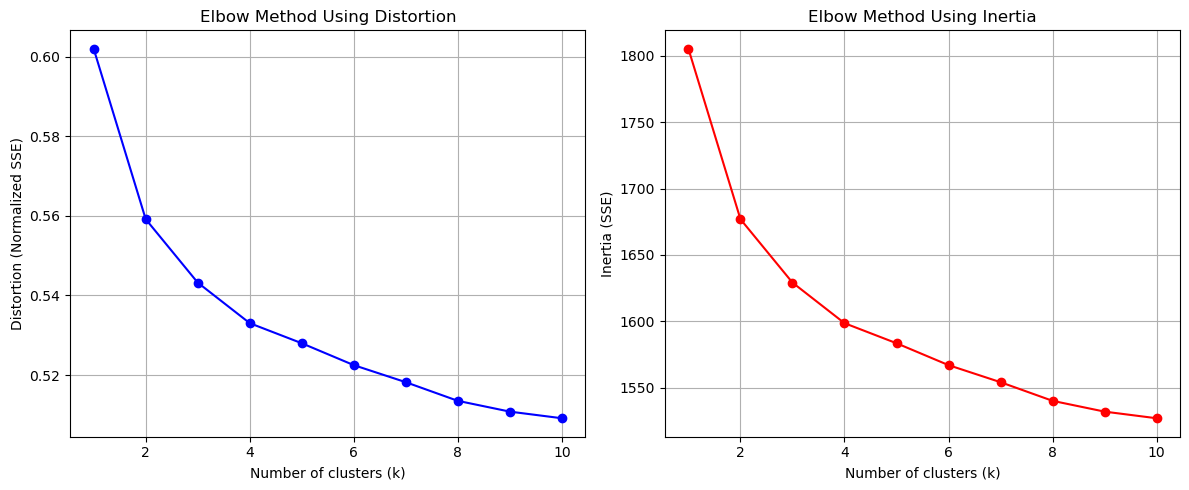

Suggested optimal number of clusters with distortions: 5
Suggested optimal number of clusters with inertias: 5
Using optimal k = 5
K-Means - Silhouette Score (k=5): 0.0346
--------------------------------------------------


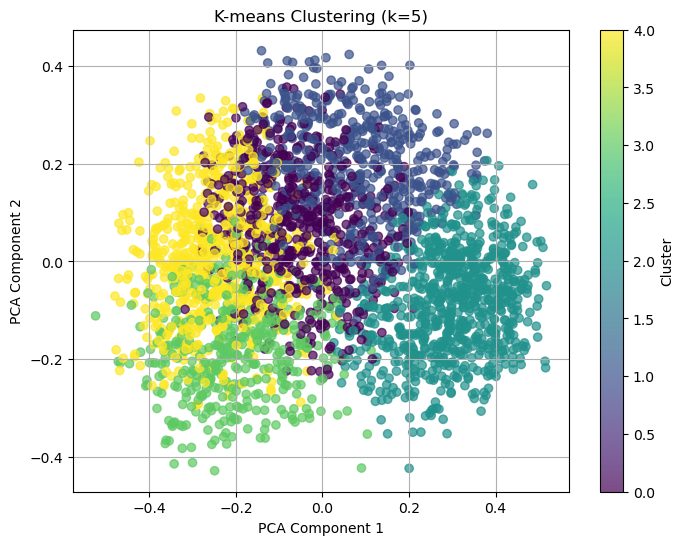

In [49]:
kmeans_labels, optimal_k = kmeans_elbow(scaled_embeddings, max_k=10)
plot_clusters(scaled_embeddings, kmeans_labels, f'K-means Clustering (k={optimal_k})')

In [50]:
kmeans_labels_count = np.unique(kmeans_labels)
len(kmeans_labels_count)

5

In [38]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

def plot_k_distance(X, k=10):
    """
    Plots the k-distance graph to help determine the optimal eps for DBSCAN.
    """
    nearest_neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = nearest_neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)

    distances = np.sort(distances[:, -1])
    plt.figure(figsize=(8, 6))
    plt.plot(distances)
    plt.title(f"{k}-Distance Plot (for DBSCAN eps estimation)")
    plt.xlabel("Points sorted by distance")
    plt.ylabel("k-distance")
    plt.show()


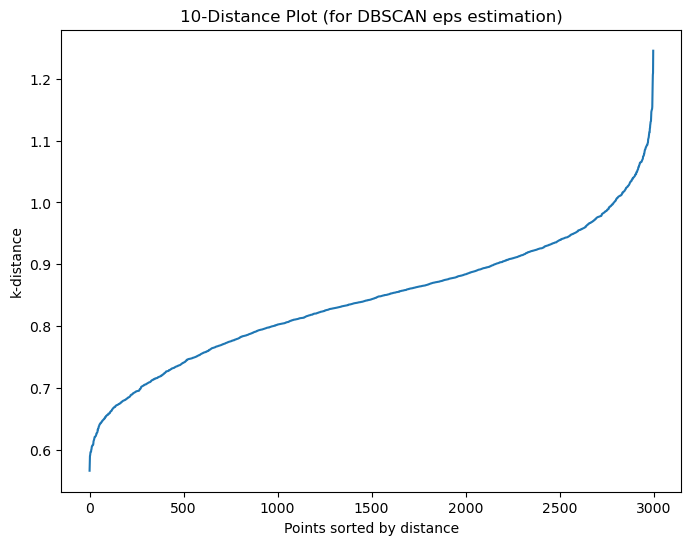

In [39]:
plot_k_distance(scaled_embeddings, k=10)


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, homogeneity_score
from sklearn.metrics.pairwise import cosine_distances

def dbscan_model(X, eps=0.65, min_samples=10, true_labels=None):
    distance_matrix = cosine_distances(X)
    dbscan = DBSCAN(metric='precomputed', eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(distance_matrix)

    sil_score = silhouette_score(X, labels)
    print(f"DBSCAN - Silhouette Score: {sil_score:.4f}")

    if true_labels is not None:
        homogeneity = homogeneity_score(true_labels, labels)
        print(f"DBSCAN - Homogeneity Score: {homogeneity:.4f}")

    return labels


DBSCAN - Silhouette Score: 0.1890


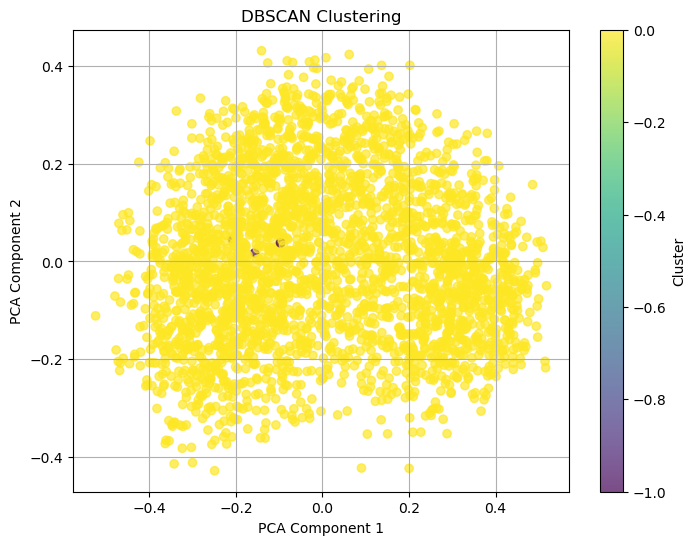

In [47]:
dbscan_labels = dbscan_model(scaled_embeddings, eps=0.65, min_samples=10)
plot_clusters(scaled_embeddings, dbscan_labels, 'DBSCAN Clustering')

In [51]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def hierarchical_cluster(X, n_clusters=5):
    plt.figure(figsize=(10, 7))
    Z = linkage(X, 'ward')
    dendrogram(Z)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()
    
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    hierarchical_labels = hierarchical.fit_predict(X)
    
    sil_score = silhouette_score(X, hierarchical_labels)
    print(f"Hierarchical Clustering - Silhouette Score (n_clusters={n_clusters}): {sil_score:.4f}")
    print("-" * 50)
    
    return hierarchical_labels


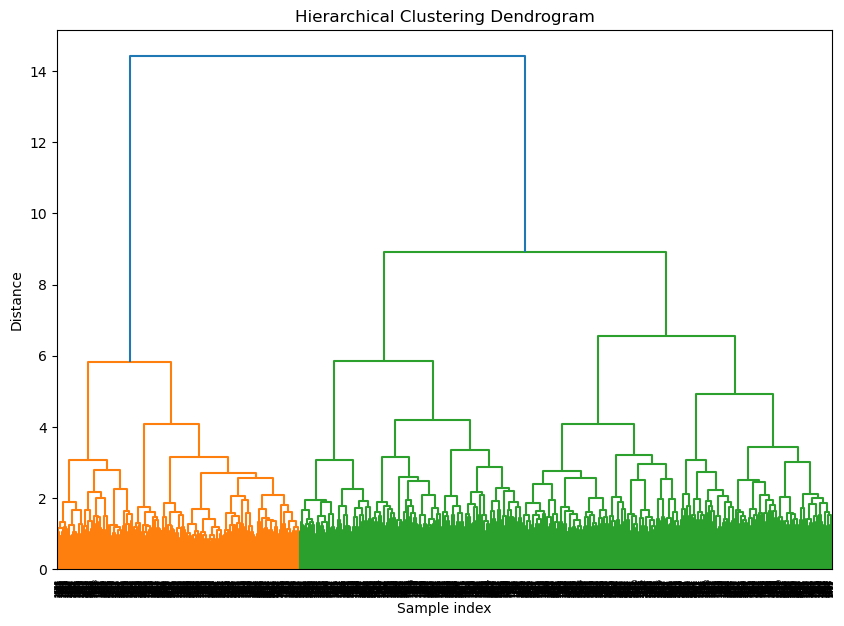

Hierarchical Clustering - Silhouette Score (n_clusters=5): 0.0241
--------------------------------------------------


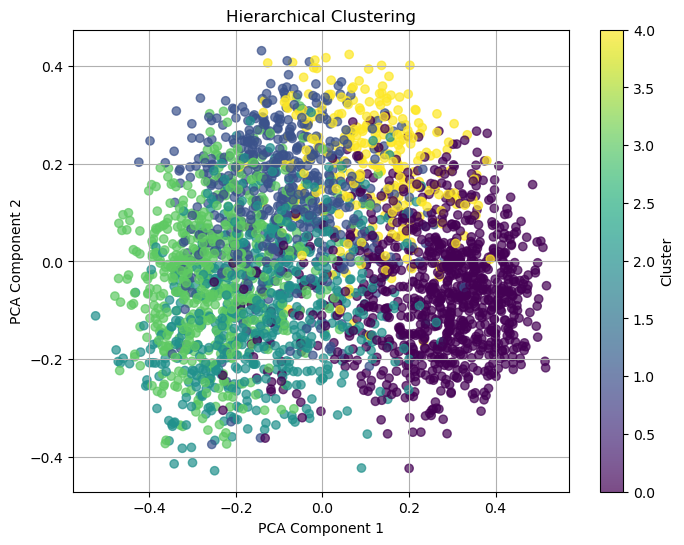

In [52]:
hierarchical_labels = hierarchical_cluster(scaled_embeddings, n_clusters=optimal_k)
plot_clusters(scaled_embeddings, hierarchical_labels, 'Hierarchical Clustering')

In [24]:
hierarchical_labels_count = np.unique(hierarchical_labels)
len(hierarchical_labels_count)

5

In [73]:
import pandas as pd

silhouette_results = {
    "Clustering Method": ["K-Means", "DBSCAN", "Hierarchical Clustering"],
    "Parameters": ["k=5", "eps=0.65", "n_clusters=5"],
    "Silhouette Score": [0.0346, 0.1890, 0.0241]
}

silhouette_df = pd.DataFrame(silhouette_results)
silhouette_df


,Clustering Method,Parameters,Silhouette Score
0,K-Means,k=5,0.0346
1,DBSCAN,eps=0.65,0.1890
2,Hierarchical Clustering,n_clusters=5,0.0241


In [ ]:
def print_sample_lyrics(df, labels, method='KMeans'):
    df['Cluster'] = labels
    print(f"\nSample lyrics from each {method} cluster:\n")
    for c in sorted(df['Cluster'].unique()):
        if c == -1:
            continue
        print(f"Cluster {c}:")
        samples = df[df['Cluster'] == c]['Lyric'].head(2)
        for i, lyric in enumerate(samples):
            print(f"  Example {i+1}:\n{lyric[:300]}...\n")
        print('-' * 80)

print_sample_lyrics(music_df.copy(), kmeans_labels, method='KMeans')
print_sample_lyrics(music_df.copy(), dbscan_labels, method='DBSCAN')
print_sample_lyrics(music_df.copy(), hierarchical_labels, method='Hierarchical')



Sample lyrics from each KMeans cluster:

Cluster 0:
  Example 1:
Im sleeping tonight with all the wolves Were dreaming of life thats better planned As long as the wind that falls isnt longing for revenge I should be safe We should be safe Shes two bitter ends So watch as those friends Enjoy suns embrace when Stories theyve told Through ears on the walls Speak sof...

  Example 2:
Yeah [Verse 1 Classified] They might say I lead a simple life, the type that dont excite And yes I like to smoke more than light til night I realize I got a problem, Im high way too often And only seem to acknowledge it after I indulge in it Pull in my driveway, walk through my front door Then make ...

--------------------------------------------------------------------------------
Cluster 1:
  Example 1:
[Produced by J Dilla] [Chorus] Ayo, this is for yall to dance to real slow Cause its fantastic! Ayo yo yo, yyo yo yo, yoyyo Its fantastic! Yo yo yoyo.. Its fantstic, yo yo yoyo... Its fantastic! Yo yo, yyo 

## Feature Reduction:

In [58]:
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=30, alpha=0.7)
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label='Cluster')
    plt.show()

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_embeddings)

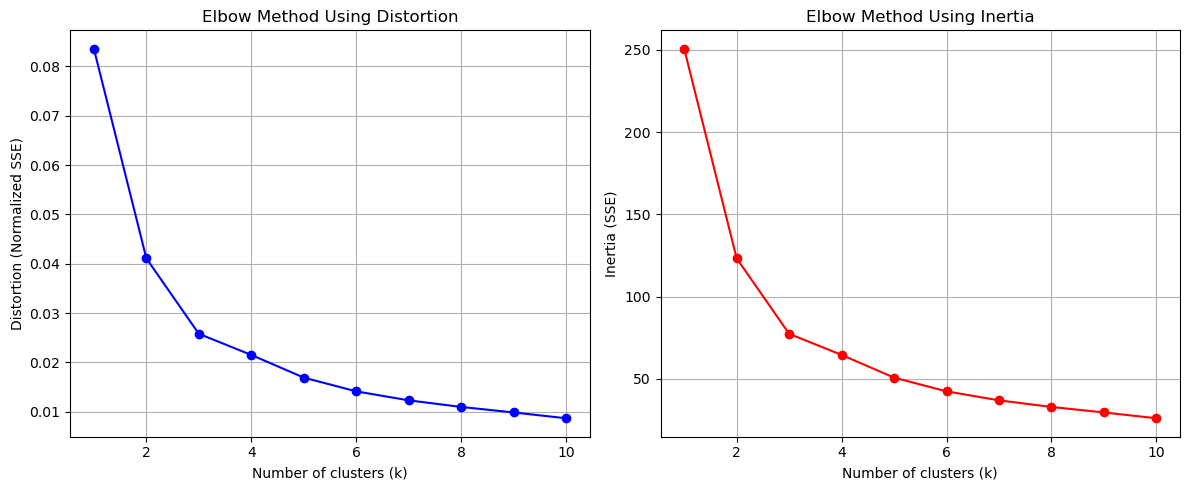

Suggested optimal number of clusters with distortions: 4
Suggested optimal number of clusters with inertias: 4
Using optimal k = 4
K-Means - Silhouette Score (k=4): 0.3788
--------------------------------------------------


In [56]:
kmeans_labels_pca, optimal_k_pca = kmeans_elbow(reduced_features, max_k=10)

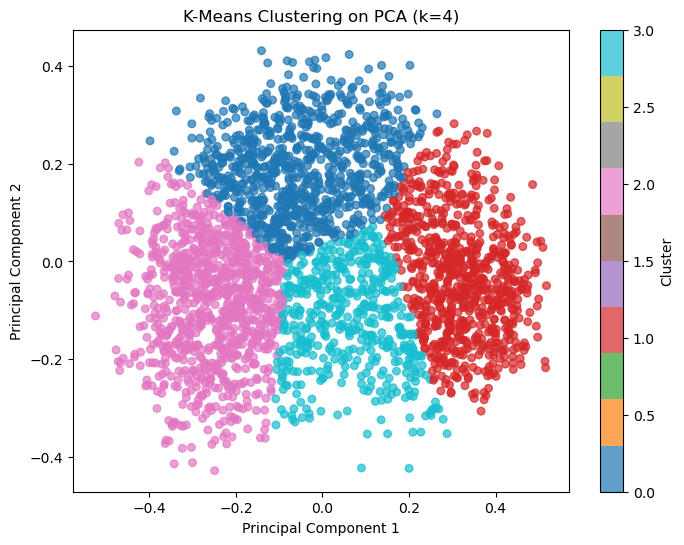

In [59]:
plot_clusters(reduced_features, kmeans_labels_pca, f'K-Means Clustering on PCA (k={optimal_k_pca})')


In [70]:
dbscan = DBSCAN(eps=0.04, min_samples=10)
dbscan_cluster_reduce = dbscan.fit_predict(reduced_features)
sil_score = silhouette_score(reduced_features, dbscan_cluster_reduce)
print(f"DBSCAN Clustering - Silhouette Score : {sil_score:.4f}")

DBSCAN Clustering - Silhouette Score : 0.2713


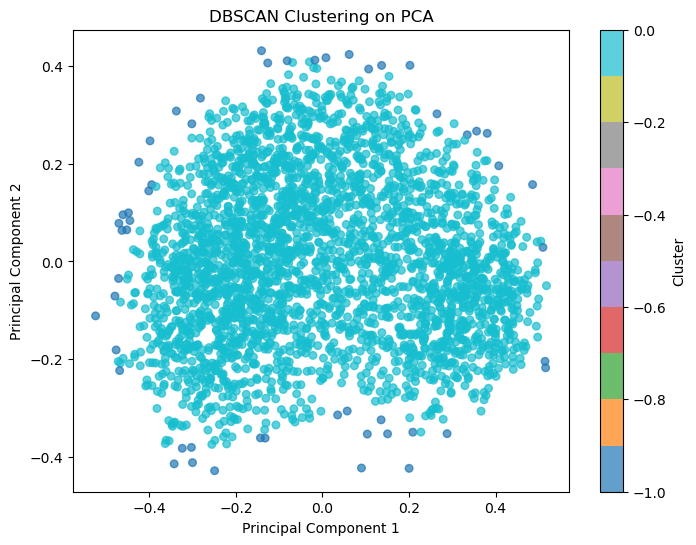

In [71]:
plot_clusters(reduced_features, dbscan_cluster_reduce, 'DBSCAN Clustering on PCA')

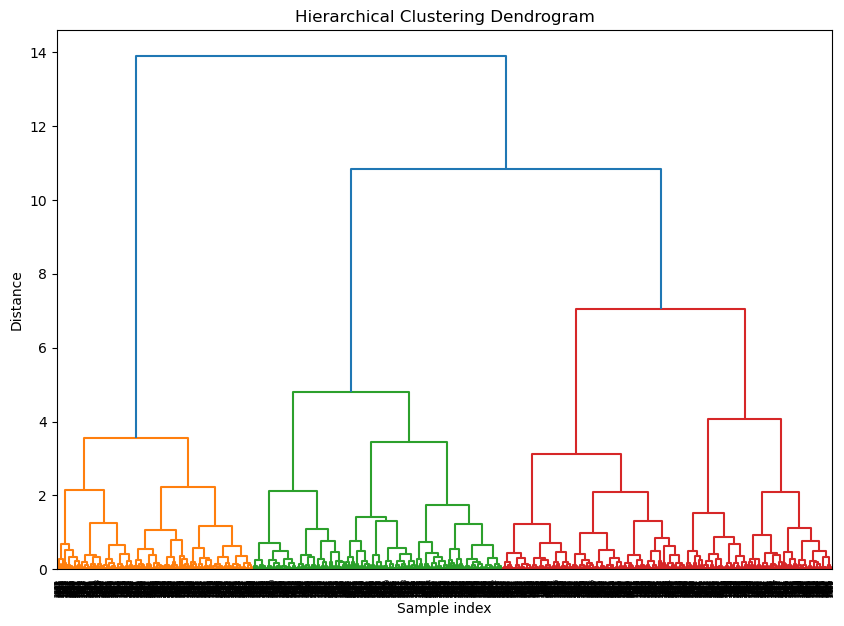

Hierarchical Clustering - Silhouette Score (n_clusters=4): 0.3277
--------------------------------------------------


In [67]:
hierarchical_labels_pca = hierarchical_cluster(reduced_features, n_clusters=4)

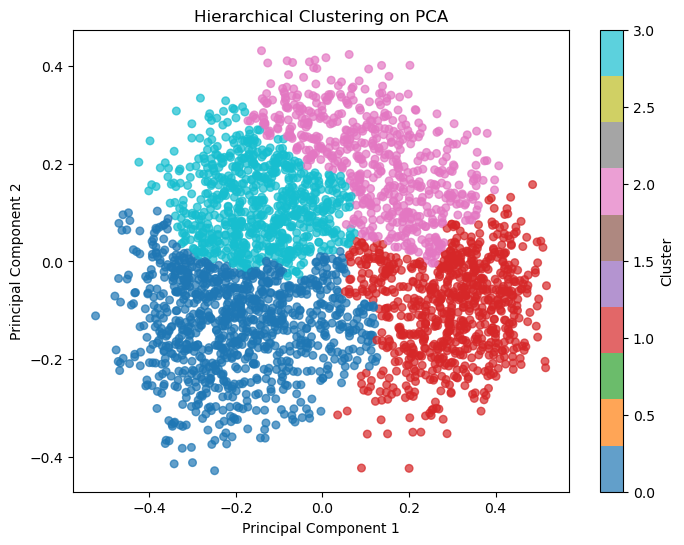

In [68]:
plot_clusters(reduced_features, hierarchical_labels_pca, 'Hierarchical Clustering on PCA')

In [74]:
import pandas as pd

silhouette_results_pca = {
    "Clustering Method": ["K-Means", "DBSCAN", "Hierarchical Clustering"],
    "Parameters": ["k=4", "eps=0.04", "n_clusters=4"],
    "Silhouette Score": [0.3788, 0.2713, 0.3277]
}

silhouette_df_pca = pd.DataFrame(silhouette_results_pca)
silhouette_df_pca


,Clustering Method,Parameters,Silhouette Score
0,K-Means,k=4,0.3788
1,DBSCAN,eps=0.04,0.2713
2,Hierarchical Clustering,n_clusters=4,0.3277


In [72]:
print_sample_lyrics(music_df.copy(), kmeans_labels_pca, method='KMeans')
print_sample_lyrics(music_df.copy(), dbscan_cluster_reduce, method='DBSCAN')
print_sample_lyrics(music_df.copy(), hierarchical_labels_pca, method='Hierarchical')


Sample lyrics from each KMeans cluster:

Cluster 0:
  Example 1:
Im sleeping tonight with all the wolves Were dreaming of life thats better planned As long as the wind that falls isnt longing for revenge I should be safe We should be safe Shes two bitter ends So watch as those friends Enjoy suns embrace when Stories theyve told Through ears on the walls Speak sof...

  Example 2:
girl girl away little girl like girl time catch look away little girl wish girl know like away maybe stay near like distant near little girl girl know like maybe stay away away girl away girl away girl...

--------------------------------------------------------------------------------
Cluster 1:
  Example 1:
[Produced by J Dilla] [Chorus] Ayo, this is for yall to dance to real slow Cause its fantastic! Ayo yo yo, yyo yo yo, yoyyo Its fantastic! Yo yo yoyo.. Its fantstic, yo yo yoyo... Its fantastic! Yo yo, yyo yo yo... We say fantaserro You say, huh, what, you know Its that shhh, tch, aiyyo Ayo, this is...



## Comparison: Before vs After PCA:

| **Clustering Method** | **Before PCA (High-Dim)**                   | **After PCA (Reduced 2D)**     | **Meaning**                                                              |
| --------------------- | ------------------------------------------- | ------------------------------ | ------------------------------------------------------------------------ |
| **K-Means**           | **0.0346 (k=5)** → very poor separation     | **0.3788 (k=4)** → much better | PCA improved cluster separation by removing noise & redundant dimensions |
| **DBSCAN**            | **0.1890 (eps=0.65)** → moderate clustering | **0.2713 (eps=0.04)** → better | PCA helped DBSCAN detect denser clusters                                 |
| **Hierarchical**      | **0.0241 (n=5)** → very poor                | **0.3277 (n=4)** → much better | PCA improved hierarchical structure detection                            |


# Questions:

## Preprocessing Part:
To prepare the textual data for clustering, several preprocessing steps were applied:

- Stop Words Removal:
Common words such as is, the, and do not add significant meaning to the text. Removing them ensures that only important and meaningful words remain.

- Removing Punctuation and Irrelevant Characters:
Punctuation marks such as , . ? ! and other non-informative symbols were removed as they add noise and do not affect the semantic meaning.

- Lowercasing:
All words were converted to lowercase to avoid treating the same word differently (e.g., Music and music).

- Lemmatization (instead of Stemming):
Lemmatization was used to return words to their base or dictionary form (e.g., running → run, better → good).


In contrast, stemming only removes word suffixes, often producing incomplete or invalid words (e.g., running → runn).



### Why These Methods Are Helpful
- Noise Reduction: Removes unimportant words and characters, allowing the model to focus on meaningful terms.

- Better Feature Quality: Clean and consistent data improves clustering accuracy and topic separation.

- Dimensionality Reduction: Fewer irrelevant words lead to fewer features, making algorithms faster and more efficient.

### Why Lemmatization Is Better than Stemming
Preserves Semantic Meaning: Lemmatization produces proper dictionary words with correct meaning, while stemming can cut words incorrectly.

Examples:

Lemmatization: better → good ✅ (semantic meaning preserved)

Stemming: better → bett ❌ (incorrect and meaningless)

Conclusion: Lemmatization results in more accurate and meaningful features, improving clustering performance.

### Why Not Just Read the Raw Text?
Reading raw text without preprocessing introduces noise and inconsistency, causing the model to treat similar words differently (e.g., Running, running, and runs). Preprocessing extracts the true semantic structure of the text, making clustering more reliable and meaningful.

## Problem Process Part:

### Why Use Feature Vectors and Their Importance?
When we work with text data (like song lyrics), machines cannot directly understand words or their meanings.
So we need to convert text into numerical representations that preserve the meaning of the text.

🔹 What Are Feature Vectors (Embeddings)?
A feature vector (or embedding) is a list of numbers that represents the meaning of a sentence or document.
Example:

"I love music" → [0.21, -0.34, 0.87, 0.10, ...]

"I enjoy songs" → [0.20, -0.32, 0.85, 0.12, ...]

Even though the sentences use different words, their vectors are very close because they mean the same thing.

🔹 Why SentenceTransformers and all-MiniLM-L6-v2?
SentenceTransformers is a library designed for semantic embeddings (capturing meaning, not just words).

all-MiniLM-L6-v2 is a lightweight yet powerful model trained on millions of sentences to understand contextual similarity:

Sentences about similar topics → vectors are close in space.

Very different topics → vectors are far apart.

🔹 Why Is This Important for Clustering?
Clustering algorithms (K-Means, DBSCAN, Hierarchical) work on numerical data — they group points that are close together.

By converting lyrics into embeddings:

Songs with similar themes (e.g., love songs) will have similar vectors and end up in the same cluster.

Songs with different themes (e.g., party music vs sad ballads) will form different clusters.

---

### Why These Clustering Methods?
We used K-Means, DBSCAN, and Hierarchical Clustering because:

K-Means: Efficient for well-separated clusters, easy to interpret.

DBSCAN: Detects arbitrary-shaped clusters and identifies noise (outliers).

Hierarchical Clustering: Useful for visualizing data structure through dendrograms.

---
### Advantages & Disadvantages of Clustering 

| Method           | Advantages                                                         | Disadvantages                                                                      |
| ---------------- | ------------------------------------------------------------------ | ---------------------------------------------------------------------------------- |
| **K-Means**      | Simple, fast, works well for spherical clusters                    | Needs the number of clusters (`k`) predefined; sensitive to outliers               |
| **DBSCAN**       | Detects arbitrary-shaped clusters, no need for k, identifies noise | Sensitive to `eps` and `min_samples` parameters; may struggle with varying density |
| **Hierarchical** | Dendrogram visualization, no need for predefined k initially       | Computationally expensive for large datasets; needs manual cut of dendrogram       |


---

### Why Use all-MiniLM-L6-v2?
It’s a lightweight transformer model optimized for sentence embeddings.

Provides high-quality semantic similarity while being much faster than large models.

Perfect for clustering text data because similar texts are mapped closer in vector space.

---

### Elbow Method in K-Means
We used the Elbow Method to determine the optimal number of clusters by plotting Inertia and Distortion.
The "elbow point" suggests where adding more clusters does not significantly reduce within-cluster variance.

---

### Supervised vs Unsupervised Learning
Supervised Learning: Works with labeled data, trains a model to predict specific labels (e.g., genre classification).

Unsupervised Learning (used here): Finds hidden structures in unlabeled data, such as grouping similar songs automatically.

---

### Text Vectorization Methods

#### Bag of Words (BoW)
- **How it works:** Counts how many times each word appears in a document.  
- **Advantage:** Simple and easy to implement.  
- **Disadvantage:** Ignores word meaning and order; treats synonyms as different words.



#### TF-IDF (Term Frequency – Inverse Document Frequency)
- **How it works:** Weights words based on how often they appear in a document and how rare they are across all documents.  
- **Advantage:** Reduces the impact of very common words (*stop words*).  
- **Disadvantage:** Still ignores word context and semantics.



#### Word Embeddings (e.g., Word2Vec, GloVe)
- **How it works:** Maps each word to a dense vector where similar words have similar vectors.  
- **Advantage:** Captures word semantics and relationships (e.g., *king – man + woman ≈ queen*).  
- **Disadvantage:** Requires large training data; cannot fully understand sentence-level meaning.



#### Sentence Embeddings (e.g., SentenceTransformers, all-MiniLM-L6-v2)
- **How it works:** Encodes entire sentences or documents into single vectors that represent their semantic meaning.  
- **Advantage:** Best for semantic similarity tasks; works well for clustering and topic modeling.  
- **Disadvantage:** More computationally expensive and slower than BoW or TF-IDF.








## PCA Part:

## Dimensionality Reduction (PCA)

### Why Dimensionality Reduction?
The feature vectors extracted by language models (like SentenceTransformers) have hundreds of dimensions.  
This high dimensionality:
- Makes **visualization** difficult (we can’t plot 384-dimensional data directly).  
- Can introduce **noise and redundant features**, reducing clustering quality.

To solve this, we use **PCA (Principal Component Analysis)** to reduce the number of dimensions while keeping most of the important information.

---

### What is PCA and How Does It Work?
- **PCA** finds new axes (principal components) that capture the highest variance in the data.  
- The first few components (e.g., 2 for 2D visualization) preserve most of the important information.  
- Example: Hundreds of features → reduced to 2 components for plotting and easier clustering.

---

### Advantages of PCA
✅ **Better Visualization:** Converts high-dimensional embeddings into 2D or 3D for easy plotting.  
✅ **Noise Reduction:** Removes less important features, keeping only the most informative variance.  
✅ **Improved Clustering:** Reducing noise often makes clusters more compact and well-separated.

### Disadvantages of PCA
❌ **Loss of Some Information:** Not all variance is preserved when reducing dimensions.  
❌ **Harder to Interpret:** Principal components are linear combinations of original features, making them less interpretable.

---

### Implementation
We used `sklearn`’s **PCA** to reduce the dimensions to 2 components for visualization and then applied clustering algorithms to the reduced data.


## Evaluation and Analysis

###  Evaluation Metrics
Two main evaluation metrics were used to assess clustering quality:

#### **1. Silhouette Score**
- **What it measures:**  
  Measures how well each sample fits within its assigned cluster compared to other clusters.  
- **Range:** `-1` to `+1`  
  - **+1:** Perfect separation between clusters  
  - **0:** Overlapping clusters  
  - **Negative:** Wrong cluster assignments  

#### **2. Homogeneity Score**
- **What it measures:**  
  Checks whether all data points in a single cluster belong to the same true class (if true labels are available).  
- **Range:** `0` to `1` (higher is better)

---

###  Results and Comparison
| Clustering Method | Silhouette (Before PCA) | Silhouette (After PCA) | Observation |
|--------------------|-------------------------|-------------------------|-------------|
| **K-Means** | 0.0346 | 0.3788 | PCA significantly improved cluster separation |
| **DBSCAN** | 0.1890 | 0.2713 | PCA helped DBSCAN form denser clusters |
| **Hierarchical** | 0.0241 | 0.3277 | PCA improved hierarchical structure clarity |


---

###  Best Method and Reasoning
- **Best Performing Method:** **K-Means after PCA**  
- **Reason:** Achieved the highest Silhouette Score and produced visually clear, well-separated clusters. PCA removed noisy features, making K-Means more effective.

